#Natural Language Processing (NLP)
This notebook covers the main concepts in NLP, providing explanations, code examples, and libraries you can use for each task.

In [ ]:
import nltk # natural language toolkit
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords') # and, it, of, the, ...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Chunking
Chunking is the process of grouping words into meaningful chunks (e.g., noun phrases).

In [ ]:
from nltk import pos_tag, word_tokenize, RegexpParser

text = "The quick brown fox jumps over the lazy dog."
tokens = word_tokenize(text)
# part of speech
pos_tags = pos_tag(tokens)
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = RegexpParser(grammar)
tree = chunk_parser.parse(pos_tags)

# Print the tree structure
tree.pretty_print()


                                S                                          
     ___________________________|_______________________________            
    |        |     |            NP               NP             NP         
    |        |     |     _______|________        |       _______|______     
jumps/VBZ over/IN ./. The/DT quick/JJ brown/NN fox/NN the/DT lazy/JJ dog/NN



## 2. Parsing
Parsing refers to the syntactic analysis of sentences to identify grammatical structures.

* Libraries: spacy, nltk



In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("The quick brown fox jumps over the lazy dog.")
for token in doc:
    print(token.text, token.dep_, token.head.text)


The det fox
quick amod fox
brown amod fox
fox nsubj jumps
jumps ROOT jumps
over prep jumps
the det dog
lazy amod dog
dog pobj over
. punct jumps


## 3. Stemming
Stemming reduces words to their root form.

* Libraries: PorterStemmer, SnowballStemmer



In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "runner", "runs", "ran"]
stems = [stemmer.stem(word) for word in words]
print(stems)


['run', 'runner', 'run', 'ran']


In [ ]:
# Sample text with contractions
text = "He's running and can't stop. The dog's tail is wagging."

# Preprocessing: Handling contractions (optional)
# This step is to remove or replace apostrophes if desired, using regex
text_clean = re.sub(r"’", "'", text)  # Replace fancy apostrophe
text_clean = re.sub(r"\b(can't|won't)\b", lambda x: x.group(0).replace("'", ""), text_clean)  # Handle can't/won't
text_clean = re.sub(r"'\b", "", text_clean)  # Remove apostrophes attached to words

# Tokenization
words = word_tokenize(text_clean)

# Apply stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
print("Original Words:", words)
print("Stemmed Words:", stemmed_words)


Original Words: ['Hes', 'running', 'and', 'cant', 'stop', '.', 'The', 'dogs', 'tail', 'is', 'wagging', '.']
Stemmed Words: ['he', 'run', 'and', 'cant', 'stop', '.', 'the', 'dog', 'tail', 'is', 'wag', '.']


In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer

# Initialize stemmers
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english")  # SnowballStemmer for English

# Sample words
words = ["running", "try", "easily", "fairly", "nationalization", "studying"]

# Apply PorterStemmer
porter_stemmed = [porter_stemmer.stem(word) for word in words]

# Apply SnowballStemmer
snowball_stemmed = [snowball_stemmer.stem(word) for word in words]

# Print comparison
print("Original Words:  ", words)
print("PorterStemmed:    ", porter_stemmed)
print("SnowballStemmed:  ", snowball_stemmed)


Original Words:   ['running', 'try', 'easily', 'fairly', 'nationalization', 'studying']
PorterStemmed:     ['run', 'tri', 'easili', 'fairli', 'nation', 'studi']
SnowballStemmed:   ['run', 'tri', 'easili', 'fair', 'nation', 'studi']


## 4. Lemmatization
Lemmatization reduces words to their base or dictionary form.

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("good well better best go gone went")
lemmas = [token.lemma_ for token in doc]
print(lemmas)


['good', 'well', 'well', 'good', 'go', 'go', 'go']


## 5. Tokenization
Tokenization splits text into individual words or sentences.

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "The quick brown fox. It jumps over the lazy dog."
word_tokens = word_tokenize(text)
sent_tokens = sent_tokenize(text)
print(word_tokens)
print(sent_tokens)


['The', 'quick', 'brown', 'fox', '.', 'It', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
['The quick brown fox.', 'It jumps over the lazy dog.']


## 6. Stopword Removal
Stopword removal eliminates common words like "the", "is", etc.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
text = "The quick brown fox jumps over the lazy dog."
words = word_tokenize(text)
filtered_words = [word for word in words if word.lower() not in stop_words]
print(filtered_words)


['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']


## 7. Lowercasing
Lowercasing converts text to all lowercase letters.

In [ ]:
text = "The Quick Brown Fox Jumps Over the LAZY Dog."
# built-in Python method
lower_text = text.lower()
print(lower_text)


the quick brown fox jumps over the lazy dog.


## 8. POS Tagging
Part of Speech (POS) tagging labels each word with its grammatical category.

In [ ]:
from nltk import word_tokenize, pos_tag

text = "The quick brown fox jumps over the lazy dog."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
print(pos_tags)


[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


## 9. N-gram Extraction
N-grams are contiguous sequences of n items from a given sample of text.

In [ ]:
from nltk import ngrams

text = "The quick brown fox jumps over the lazy dog"
tokens = word_tokenize(text)
trigrams = list(ngrams(tokens, 3))
print(trigrams)


[('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]


## 10. TF-IDF
TF-IDF (Term Frequency-Inverse Document Frequency) is a weighting technique to evaluate how important a word is in a document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["The quick brown fox jumps", "The lazy dog lies down"]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print(tfidf_matrix.toarray())


[[0.47107781 0.         0.         0.47107781 0.47107781 0.
  0.         0.47107781 0.33517574]
 [0.         0.47107781 0.47107781 0.         0.         0.47107781
  0.47107781 0.         0.33517574]]


## 11. Bag of Words
Bag of Words converts text into a matrix of word counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ["The quick brown fox jumps over the tree", "The lazy dog lies down over the ground and the cat is standing beside the tree"]
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)
print(bow_matrix.toarray())


[[0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 2 1]
 [1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 4 1]]


## 12. Named Entity Recognition (NER)
NER identifies proper nouns like person names, locations, etc.

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("Apple is looking at buying U.K. startup for $1 billion. Steve Jobs was eating an apple.")
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple ORG
U.K. GPE
$1 billion MONEY
Steve PERSON


## 13. Word Embedding (Word2Vec, GloVe)
Word embeddings are dense vector representations of words.

In [ ]:
import gensim.downloader as api
from numpy import dot
from numpy.linalg import norm

model = api.load("glove-wiki-gigaword-50")
# Sample sentence
sentence = 'king was in the near bank to swim in and then went to the bank to invest money. The bank was close'

# Tokenize the sentence
words = sentence.split()

# Initialize a list to store embeddings for "bank"
bank_vectors = []

# Loop over each word to find embeddings for "bank"
for word in words:
    if word == 'bank':
        if word in model:
            bank_vectors.append(model[word])

print(bank_vectors)


[array([ 0.66488 , -0.11391 ,  0.67844 ,  0.17951 ,  0.6828  , -0.47787 ,
       -0.30761 ,  0.17489 , -0.70512 , -0.55022 ,  0.1514  ,  0.10214 ,
       -0.45063 , -0.33069 ,  0.056133,  1.2271  ,  0.55607 , -0.68297 ,
        0.037364,  0.70266 ,  1.9093  , -0.61483 , -0.83329 , -0.3023  ,
       -1.1118  , -1.55    ,  0.2604  ,  0.22957 , -1.0375  , -0.31789 ,
        3.5091  , -0.25871 ,  1.0151  ,  0.65927 , -0.18231 , -0.75859 ,
       -0.30927 , -0.91678 ,  1.0633  , -0.66761 , -0.37464 , -0.29143 ,
        0.65606 , -0.44642 , -0.075495, -1.0552  , -0.60501 ,  0.73582 ,
        1.0139  , -0.27749 ], dtype=float32), array([ 0.66488 , -0.11391 ,  0.67844 ,  0.17951 ,  0.6828  , -0.47787 ,
       -0.30761 ,  0.17489 , -0.70512 , -0.55022 ,  0.1514  ,  0.10214 ,
       -0.45063 , -0.33069 ,  0.056133,  1.2271  ,  0.55607 , -0.68297 ,
        0.037364,  0.70266 ,  1.9093  , -0.61483 , -0.83329 , -0.3023  ,
       -1.1118  , -1.55    ,  0.2604  ,  0.22957 , -1.0375  , -0.31789 ,
    

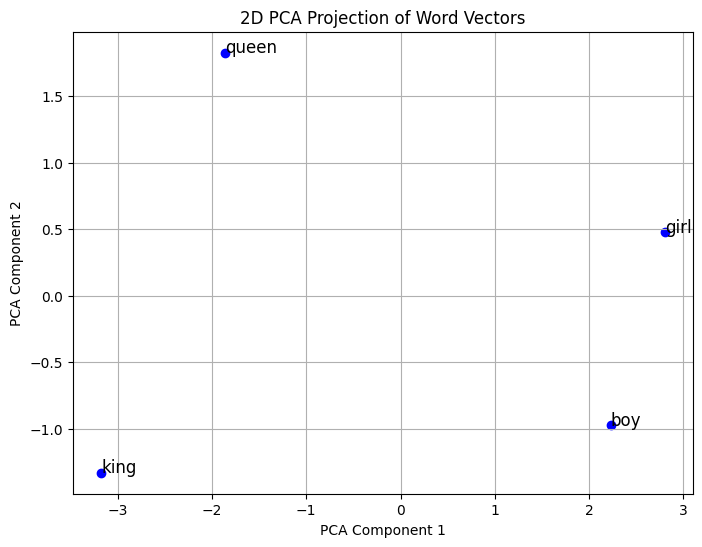

In [ ]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load GloVe vectors from gensim's API
model = api.load("glove-wiki-gigaword-50")

# Words to visualize
words = ["king", "queen", "girl", "boy"]

# Extract the word vectors
word_vectors = [model[word] for word in words]

# Perform PCA for 2D projection
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='blue')

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.title("2D PCA Projection of Word Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## 14. Sentence Segmentation
Sentence segmentation divides text into sentences.

In [ ]:
from nltk.tokenize import sent_tokenize

text = "The quick brown fox jumps over the lazy dog. It then ran away."
sentences = sent_tokenize(text)
print(sentences)


['The quick brown fox jumps over the lazy dog.', 'It then ran away.']


## 15. Regex

### 15.1. Phone Numbers (+dd-ddddddd)
To match phone numbers in the form of +dd-ddddddd, where d is a digit:

In [ ]:
import re

# Sample text with phone numbers
text = "Here are two phone numbers: +12-345678923 and +44-1234567."

# Regular expression for phone number format +dd-ddddddd
phone_pattern = r"\+\d{2}-\d{7,}"

# Find all matches
phone_numbers = re.findall(phone_pattern, text)
print(phone_numbers)


['+12-345678923', '+44-1234567']


###15.2. Email Addresses
A common regex for matching standard email addresses (though not exhaustive) is:

In [ ]:
# Regular expression for email addresses
email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

# Sample text with emails
text = "Please contact us at info@example.com or support@company.org or reza@info.nl"

# Find all email matches
email_addresses = re.findall(email_pattern, text)
print(email_addresses)


['info@example.com', 'support@company.org', 'reza@info.nl']
